In [1]:
%matplotlib inline
import pandas as pd
import csv as csv
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
#from sklearn import datasets, linear_model
import matplotlib
import matplotlib.pylab as pl
from matplotlib import rcParams
from mpl_toolkits.basemap import Basemap
#import sqlite3

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
import glob

In [3]:
path = '../csv/2015/'
all_files = glob.glob(path + '*')
df_list = []

ds = pd.DataFrame()

for f in all_files:
    df = pd.read_csv(f,index_col=None,header=0)
    df_list.append(df)

ds = pd.concat(df_list).reset_index()

In [4]:
len(ds)

5819079

In [5]:
ds.columns

Index([u'index', u'MONTH', u'DAY_OF_MONTH', u'DAY_OF_WEEK', u'UNIQUE_CARRIER',
       u'ORIGIN', u'DEST', u'DEP_TIME', u'ARR_DEL15', u'Unnamed: 8'],
      dtype='object')

In [6]:
ds = ds.drop(['index','Unnamed: 8'],axis=1)
ds = ds.drop_duplicates()

In [7]:
lcase_col = [x.lower() for x in ds.columns]
ds.columns = lcase_col

In [8]:
ds.columns

Index([u'month', u'day_of_month', u'day_of_week', u'unique_carrier', u'origin',
       u'dest', u'dep_time', u'arr_del15'],
      dtype='object')

In [9]:
airports = pd.read_csv('../csv/airports.csv',header=0)
carriers = pd.read_csv('../csv/carriers2.csv',header=0)

In [10]:
airports = airports[airports['country']=='USA']
airports = airports.drop('country',axis=1)

In [11]:
airports.head()

,iata,airport,city,state,lat,long
0,00M,Thigpen,Bay Springs,MS,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,30.688012,-81.905944


In [12]:
airports = airports.rename(columns={'iata':'origin'})

ds = pd.merge(ds,airports,on=['origin'])
ds = ds.drop(['city','state','airport'],axis=1)
ds = ds.rename(columns={'lat':'orig_lat','long':'orig_lon'})

airports = airports.rename(columns={'origin':'dest'})

ds = pd.merge(ds,airports,on=['dest'])
ds = ds.drop(['city','state','airport'],axis=1)
ds = ds.rename(columns={'lat':'dest_lat','long':'dest_lon'})

In [13]:
ds.head()

,month,day_of_month,day_of_week,unique_carrier,origin,dest,dep_time,arr_del15,orig_lat,orig_lon,dest_lat,dest_lon
0,4,1,3,AA,JFK,LAX,848,0,40.639751,-73.778926,33.942536,-118.408074
1,4,2,4,AA,JFK,LAX,853,0,40.639751,-73.778926,33.942536,-118.408074
2,4,3,5,AA,JFK,LAX,853,1,40.639751,-73.778926,33.942536,-118.408074
3,4,4,6,AA,JFK,LAX,855,1,40.639751,-73.778926,33.942536,-118.408074
4,4,5,7,AA,JFK,LAX,853,0,40.639751,-73.778926,33.942536,-118.408074


In [14]:
airline_del = ds.groupby('unique_carrier').agg({
        'arr_del15':'sum',
        'dep_time':'count'
    }).rename(columns={'dep_time':'N_flights'})

In [15]:
airline_del['frac_del'] = airline_del['arr_del15'].apply(lambda x:float(x)) / \
    airline_del['N_flights'].apply(lambda y:float(y))

In [16]:
airline_del.reset_index(inplace=True)

In [17]:
carriers.columns = ['unique_carrier','name_carrier']

In [18]:
airline_del = pd.merge(airline_del,carriers,on='unique_carrier')

In [19]:
airline_del

,unique_carrier,N_flights,arr_del15,frac_del,name_carrier
0,AA,715531,130229,0.182003,American Airlines
1,AS,171906,22348,0.130001,Alaska Airlines
2,B6,262832,59165,0.225106,JetBlue
3,DL,867986,117477,0.135344,Delta
4,EV,555809,108954,0.196028,Atlantic Southeast
5,F9,89969,23490,0.261090,Frontier
6,HA,76085,8609,0.113150,Hawaiian
7,MQ,280271,60536,0.215991,American Eagle
8,NK,114868,34032,0.296271,Spirit
9,OO,578945,107765,0.186140,Skywest


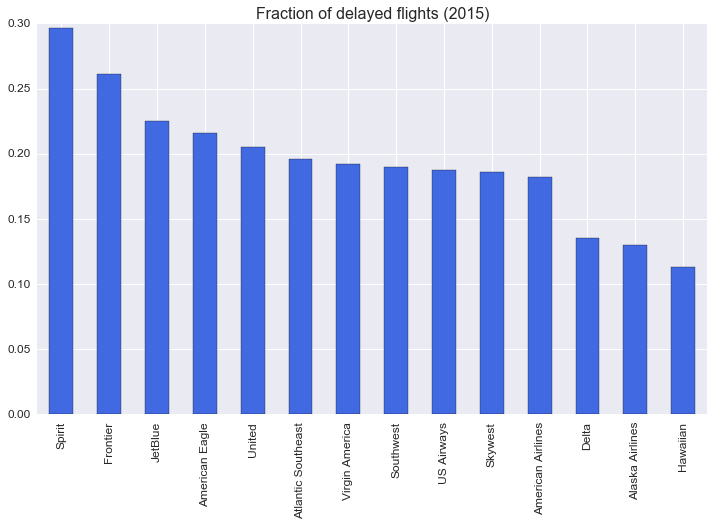

In [24]:
ad_temp = airline_del.sort_values('frac_del',ascending=False)
rcParams['figure.figsize'] = (12,7)
ax = ad_temp.plot.bar(y='frac_del',color = 'royalblue',
                       fontsize = 12, legend=False, rot=90)

ax.set_xticklabels(ad_temp['name_carrier'])
#ax.set_xlabel('Airline', fontsize = 16)
#ax.set_ylabel('Delayed', fontsize = 16)
ax.set_title('Fraction of delayed flights (2015)',fontsize=16)

In [25]:
month_del = ds.groupby('month').agg({
        'arr_del15':'sum',
        'dep_time':'count'
    }).rename(columns={'dep_time':'N_flights'})

In [26]:
month_del['frac_del'] = month_del['arr_del15'].apply(lambda x:float(x)) / \
    month_del['N_flights'].apply(lambda y:float(y))

In [28]:
month_del.sort_values('month',inplace=True)

In [29]:
month_del.reset_index(inplace=True)

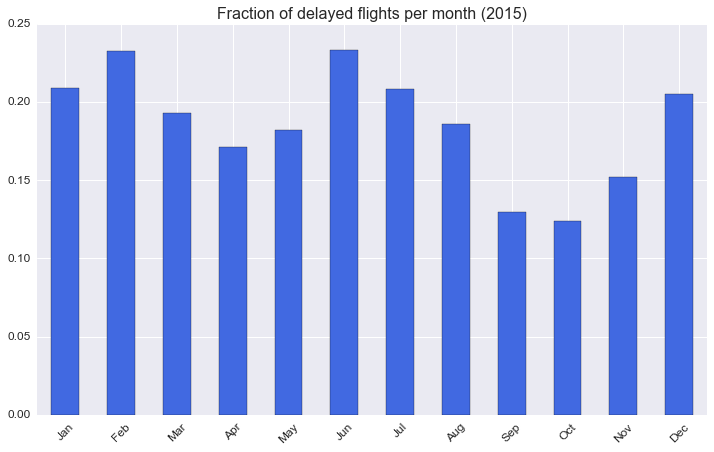

In [37]:
rcParams['figure.figsize'] = (12,7)
ax = month_del.plot.bar(y='frac_del',color = 'royalblue',
                       fontsize = 12, legend=False,rot=45)

ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
#ax.set_xlabel('Airline', fontsize = 16)
#ax.set_ylabel('Delayed', fontsize = 16)
ax.set_title('Fraction of delayed flights per month (2015)',fontsize=16)

In [38]:
weekday_del = ds.groupby('day_of_week').agg({
        'arr_del15':'sum',
        'dep_time':'count'
    }).rename(columns={'dep_time':'N_flights'})

In [39]:
weekday_del['frac_del'] = weekday_del['arr_del15'].apply(lambda x:float(x)) / \
    weekday_del['N_flights'].apply(lambda y:float(y))

In [41]:
weekday_del.reset_index(inplace=True)
weekday_del.sort_values('day_of_week',inplace=True)
weekday_del.reset_index(inplace=True)

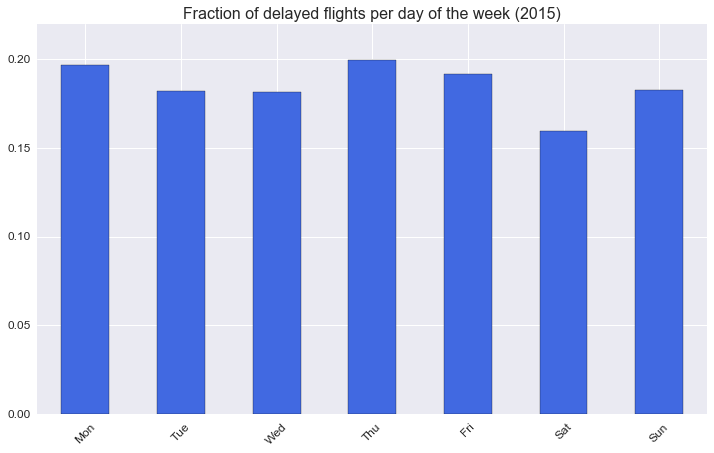

In [46]:
rcParams['figure.figsize'] = (12,7)
ax = weekday_del.plot.bar(y='frac_del',color = 'royalblue',
                       fontsize = 12, legend=False,rot=45,ylim=[0.0,0.22])

ax.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
#ax.set_xlabel('Airline', fontsize = 16)
#ax.set_ylabel('Delayed', fontsize = 16)
ax.set_title('Fraction of delayed flights per day of the week (2015)',fontsize=16)

In [53]:
monthday_del = ds.groupby('day_of_month').agg({
        'arr_del15':'sum',
        'dep_time':'count'
    }).rename(columns={'dep_time':'N_flights'})

In [54]:
monthday_del['frac_del'] = monthday_del['arr_del15'].apply(lambda x:float(x)) / \
    monthday_del['N_flights'].apply(lambda y:float(y))

In [56]:
monthday_del.reset_index(inplace=True)
monthday_del.sort_values('day_of_month',inplace=True)
monthday_del.reset_index(inplace=True)

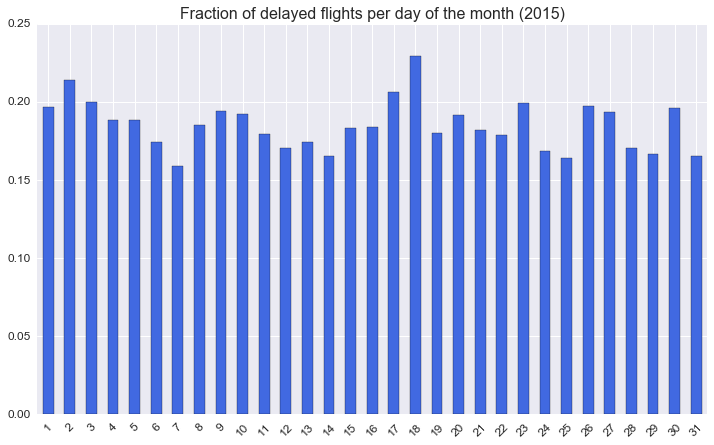

In [66]:
rcParams['figure.figsize'] = (12,7)
ax = monthday_del.plot.bar(y='frac_del',color = 'royalblue',
                       fontsize = 12, legend=False,rot=45)#,ylim=[0.0,0.22])

ax.set_xticklabels(monthday_del['day_of_month'])
#ax.set_xlabel('Airline', fontsize = 16)
#ax.set_ylabel('Delayed', fontsize = 16)
ax.set_title('Fraction of delayed flights per day of the month (2015)',fontsize=16)